Background

This exercise will be base on Covid 19  data where I will performing analyses which I will be demonstrating with visualisations

COVID-19 is an infectious disease caused by a variant of the coronavirus family. The disease is associated with respiratory illnesses. 
Response Variables:
1. t1: The number of days it takes for a country to report a confirmed infec- tion following the earliest report date in china. 
2. t2: The number of days it takes for a country to report it’s first known death as a result of the virus following it’s first confirmed infection. 
The earliest confirmed case of COVID-19 is unofficially reported to be 17 November 2019 
Demographic Variables:
The following demographic variables are used to fit the model:
1. Population: country population
2. Annual Change: annual change of population in proportions
3. Annual Change Absolute: annual change of population in absolute terms 4. Density: P/km2
5. Land Area: km2
6. Migrants: Net migration in the country
7. Fertility Rate
8. Median Age
9. Urban Population: Proportion of population living in urban areas 
10. World Share
11. Migration index = sgn(Migrants)×ln(abs(Migrants)) 
12. lnPopulation = ln(Population) 
The demographic data is with respect to the year 2020, as reported by worldometer 

Additional Variables

An additional predictor was retrieved from wikipedia [2] due to the association of the virus with travelling: 
1. Passengers: Annual number of airline passengers per country 2. lnPassengers = ln(Passengers) 
The data has been processed and stored in the repository. 


Summary Statistics Overview 

Data from approximately 169 countries was used to fit the linear model. Atleast 54 of these countries have not recorded a death as a result of COVID-19. Also, atleast 11 countries have missing demographic data, especially countries with very small population sizes such the Holy See. 


Narrative Description of the Visualizations:

Graph 1 - t1 vs t2 per country, weighted by population median age:
This scatter plot represents the relationship between two time intervals, "t1" and "t2," for different countries. Each data point represents a country, and its position on the plot is determined by "t1" on the x-axis and "t2" on the y-axis. The size of the data points is weighted by the median age of the population in each country. This visualization aims to explore any potential correlation between the time it takes for a country to report a confirmed infection ("t1") and the time it takes to report its first known death ("t2"), considering the median age of the population.

Graph 2 - lnPassengers vs t1 per country, weighted by fertility rate:
This scatter plot displays the relationship between the natural logarithm of the annual number of airline passengers per country ("lnPassengers") and "t1," the time it takes for a country to report a confirmed infection. The size of the data points is weighted by the fertility rate of each country. This visualization helps explore any associations between air travel (represented by "lnPassengers") and the time it takes for COVID-19 cases to be confirmed ("t1"), considering the country's fertility rate.

Graph 3 - Median Age vs t1 per country, weighted by air traffic passengers per year:
This scatter plot illustrates the relationship between the median age of the population ("Median_Age") and "t1," the time it takes for a country to report a confirmed infection. The size of the data points is weighted by the number of air traffic passengers per year for each country ("Passengers"). This visualization aims to investigate the potential impact of the country's population age structure and air travel on the speed of confirming COVID-19 cases.

Graph 4 - Correlation Matrix:
This heatmap represents the correlation matrix between various numerical variables in the dataset. It provides insights into the relationships and dependencies between different features, helping to identify any strong positive or negative correlations. This visualization is essential for understanding how various variables influence each other and their potential significance in the analysis.
Circumstances for Using the Visualizations:

Understanding Time Intervals: Graphs 1 and 2 are suitable for analyzing time intervals ("t1" and "t2") related to COVID-19 cases, offering insights into the time it takes to detect infections and deaths. These visualizations help identify countries with faster or slower response times.
Impact of Air Travel and Age Structure: Graphs 2 and 3 are beneficial for understanding the relationship between air travel (represented by "lnPassengers") and the country's age structure ("Median_Age") in the context of COVID-19 cases ("t1"). These visualizations can highlight countries with higher air traffic and potentially younger populations that may be affected differently.


The library used for the visualizations described in the previous messages is Seaborn. Here's a background on Seaborn and why it is suitable for these visualizations:

Background on Seaborn:

Seaborn is a Python data visualization library based on Matplotlib, created by Michael Waskom.
It is an open-source library distributed under the BSD license, making it freely accessible and modifiable for users.
Seaborn builds on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.
The library is specifically designed to work seamlessly with Pandas DataFrames, making it an ideal choice for data analysis and visualization tasks.
Installing Seaborn:
To install Seaborn, you can use pip, a package manager for Python:
pip install seaborn

Since I am using Jupyter notebook:
import seaborn as sns

General Approach and Limitations:

Declarative Approach: Seaborn follows a declarative approach to data visualization, where users specify what they want to visualize, and Seaborn takes care of the underlying details. This approach makes it more intuitive and user-friendly, especially for users who are not familiar with low-level plotting libraries like Matplotlib.
Integration with Jupyter: Seaborn integrates seamlessly with Jupyter notebooks, making it highly convenient for data scientists and analysts who often use Jupyter for data exploration and analysis. Visualizations created with Seaborn can be directly displayed within Jupyter notebooks.
Statistical Visualization: Seaborn is specifically designed for statistical data visualization. It provides a wide range of statistical plots, such as scatter plots, bar plots, box plots, and heatmaps, that are commonly used for exploring relationships, distributions, and patterns in data.
Attractive Aesthetics: Seaborn offers attractive default styles and color palettes, which create visually appealing plots with minimal customization. This feature is particularly useful when the focus is on quick and informative visualizations.
Integration with Pandas: One of the significant advantages of Seaborn is its ability to work directly with Pandas DataFrames. This makes it easy to pass data directly from Pandas to Seaborn plotting functions, streamlining the data visualization process.
Reasons for Choosing Seaborn:

Simplified Syntax: Seaborn's high-level functions and concise syntax allow for quick and straightforward creation of complex statistical visualizations. This makes it well-suited for generating multiple plots with minimal code.
Statistical Insights: As the analysis involves exploring relationships, patterns, and correlations between various COVID-19 and demographic variables, Seaborn's statistical visualization capabilities are particularly relevant.
Integration with Pandas: The data used in the analysis is likely stored and manipulated using Pandas DataFrames. Seaborn's seamless integration with Pandas simplifies data preparation and visualization.
Quick and Attractive Plots: The need to produce informative yet visually appealing plots aligns well with Seaborn's default styles and palettes, which can produce aesthetically pleasing visualizations without extensive customization.
Other Options:

While Seaborn is a powerful library for statistical data visualization, there are other options available, such as Matplotlib (its foundation), Plotly (for interactive visualizations), and Altair (declarative visualization library). The choice of library depends on specific requirements, data complexity, and user familiarity with the library's syntax and features.

In conclusion, Seaborn is chosen for its ease of use, statistical visualization capabilities, integration with Pandas, and quick creation of attractive visualizations, which are essential for exploring relationships and patterns in COVID-19 and demographic data. It complements the analysis goals and requirements effectively.


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
#loading dataset
data = pd.read_csv("https://raw.githubusercontent.com/AntwiRich/population_data/main/timeline.csv")
data.head()

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18,25,0.50,1858560.0
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36,63,0.04,10315.0
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29,73,0.56,6241920.0
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,N.A.,88,0.00,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17,67,0.42,1581200.0


In [5]:
def clean_string(string):
    """Removes invalid characters from a string."""
    try:
      return float(re.sub(r'[^\d.]+', '', string))
    except:
      return None

In [6]:
#Cleaning data
data["Median_Age"] = data["Median_Age"].apply(clean_string)
data

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25,0.50,1858560.0
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63,0.04,10315.0
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73,0.56,6241920.0
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88,0.00,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67,0.42,1581200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,109,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Western Sahara,140,NaN,597339.0,2.55,14876.0,2.0,266.0,5582.0,2.4,28.0,87,0.01,NaN
182,Yemen,145,NaN,29825964.0,2.28,664042.0,56.0,52797.0,-30.0,3.8,20.0,38,0.38,13257.0
183,Zambia,122,15.0,18383955.0,2.93,522925.0,25.0,74339.0,-8.0,4.7,18.0,45,0.24,15457.0


In [7]:
#Cleaning data
data["Urban_Population"] = data["Urban_Population"].apply(clean_string)
data.head(11)

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25.0,0.50,1858560.0
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63.0,0.04,10315.0
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73.0,0.56,6241920.0
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88.0,0.00,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42,1581200.0
5,Antigua and Barbuda,117,25.0,97929.0,0.84,811.0,223.0,440.0,0.0,2.0,34.0,26.0,0.00,59052.0
6,Argentina,107,5.0,45195774.0,0.93,415097.0,17.0,2736690.0,48.0,2.3,32.0,93.0,0.58,18308370.0
7,Armenia,105,25.0,2963243.0,0.19,5512.0,104.0,2847.0,-4998.0,1.8,35.0,63.0,0.04,NaN
8,Australia,70,35.0,25499884.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33,74257330.0
9,Austria,100,16.0,9006398.0,0.57,51296.0,109.0,82409.0,65.0,1.5,43.0,57.0,0.12,16171640.0


In [8]:
data["migration_index"] = data["Migrants"].apply(lambda x: x * np.log(abs(x)))
data.head(11)

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25.0,0.50,1858560.0,-5.503634e+04
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63.0,0.04,10315.0,-3.694680e+01
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73.0,0.56,6241920.0,-2.302585e+01
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88.0,0.00,NaN,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42,1581200.0,5.621689e+04
5,Antigua and Barbuda,117,25.0,97929.0,0.84,811.0,223.0,440.0,0.0,2.0,34.0,26.0,0.00,59052.0,NaN
6,Argentina,107,5.0,45195774.0,0.93,415097.0,17.0,2736690.0,48.0,2.3,32.0,93.0,0.58,18308370.0,1.858176e+02
7,Armenia,105,25.0,2963243.0,0.19,5512.0,104.0,2847.0,-4998.0,1.8,35.0,63.0,0.04,NaN,-4.256693e+04
8,Australia,70,35.0,25499884.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33,74257330.0,1.894506e+06
9,Austria,100,16.0,9006398.0,0.57,51296.0,109.0,82409.0,65.0,1.5,43.0,57.0,0.12,16171640.0,2.713352e+02


In [9]:
data["country"] = data["country"].astype("category")
data.head(11)

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25.0,0.50,1858560.0,-5.503634e+04
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63.0,0.04,10315.0,-3.694680e+01
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73.0,0.56,6241920.0,-2.302585e+01
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88.0,0.00,NaN,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42,1581200.0,5.621689e+04
5,Antigua and Barbuda,117,25.0,97929.0,0.84,811.0,223.0,440.0,0.0,2.0,34.0,26.0,0.00,59052.0,NaN
6,Argentina,107,5.0,45195774.0,0.93,415097.0,17.0,2736690.0,48.0,2.3,32.0,93.0,0.58,18308370.0,1.858176e+02
7,Armenia,105,25.0,2963243.0,0.19,5512.0,104.0,2847.0,-4998.0,1.8,35.0,63.0,0.04,NaN,-4.256693e+04
8,Australia,70,35.0,25499884.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33,74257330.0,1.894506e+06
9,Austria,100,16.0,9006398.0,0.57,51296.0,109.0,82409.0,65.0,1.5,43.0,57.0,0.12,16171640.0,2.713352e+02


In [10]:
#log helps to transform the scale of the field in order to compare
data["lnPopulation"] = np.log(data["Population"])
data.head(10)

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index,lnPopulation
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25.0,0.50,1858560.0,-5.503634e+04,17.477233
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63.0,0.04,10315.0,-3.694680e+01,14.872536
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73.0,0.56,6241920.0,-2.302585e+01,17.596309
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88.0,0.00,NaN,NaN,11.254996
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42,1581200.0,5.621689e+04,17.307958
5,Antigua and Barbuda,117,25.0,97929.0,0.84,811.0,223.0,440.0,0.0,2.0,34.0,26.0,0.00,59052.0,NaN,11.491998
6,Argentina,107,5.0,45195774.0,0.93,415097.0,17.0,2736690.0,48.0,2.3,32.0,93.0,0.58,18308370.0,1.858176e+02,17.626514
7,Armenia,105,25.0,2963243.0,0.19,5512.0,104.0,2847.0,-4998.0,1.8,35.0,63.0,0.04,NaN,-4.256693e+04,14.901795
8,Australia,70,35.0,25499884.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33,74257330.0,1.894506e+06,17.054184
9,Austria,100,16.0,9006398.0,0.57,51296.0,109.0,82409.0,65.0,1.5,43.0,57.0,0.12,16171640.0,2.713352e+02,16.013446


In [11]:
#log helps to transform the scale of the field in order to compare
data["lnPassengers"] = np.log(data["Passengers"])
data.head(11)

/Users/richard/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index,lnPopulation,lnPassengers
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25.0,0.50,1858560.0,-5.503634e+04,17.477233,14.435313
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63.0,0.04,10315.0,-3.694680e+01,14.872536,9.241354
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73.0,0.56,6241920.0,-2.302585e+01,17.596309,15.646798
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88.0,0.00,NaN,NaN,11.254996,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42,1581200.0,5.621689e+04,17.307958,14.273695
5,Antigua and Barbuda,117,25.0,97929.0,0.84,811.0,223.0,440.0,0.0,2.0,34.0,26.0,0.00,59052.0,NaN,11.491998,10.986174
6,Argentina,107,5.0,45195774.0,0.93,415097.0,17.0,2736690.0,48.0,2.3,32.0,93.0,0.58,18308370.0,1.858176e+02,17.626514,16.722869
7,Armenia,105,25.0,2963243.0,0.19,5512.0,104.0,2847.0,-4998.0,1.8,35.0,63.0,0.04,NaN,-4.256693e+04,14.901795,NaN
8,Australia,70,35.0,25499884.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33,74257330.0,1.894506e+06,17.054184,18.123047
9,Austria,100,16.0,9006398.0,0.57,51296.0,109.0,82409.0,65.0,1.5,43.0,57.0,0.12,16171640.0,2.713352e+02,16.013446,16.598770


In [10]:
data = data.loc[data["t1"] > 66]
data.head(11)

,country,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index,lnPopulation,lnPassengers
0,Afghanistan,99,27.0,38928346.0,2.33,886592.0,60.0,65286.0,-6292.0,4.6,18.0,25.0,0.50,1858560.0,-5.503634e+04,17.477233,14.435313
1,Albania,113,2.0,2877797.0,-0.11,-312.0,105.0,274.0,-14.0,1.6,36.0,63.0,0.04,10315.0,-3.694680e+01,14.872536,9.241354
2,Algeria,100,16.0,43851044.0,1.85,79799.0,18.0,2381740.0,-10.0,3.1,29.0,73.0,0.56,6241920.0,-2.302585e+01,17.596309,15.646798
3,Andorra,106,20.0,77265.0,0.16,123.0,164.0,470.0,NaN,NaN,NaN,88.0,0.00,NaN,NaN,11.254996,NaN
4,Angola,124,9.0,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42,1581200.0,5.621689e+04,17.307958,14.273695
5,Antigua and Barbuda,117,25.0,97929.0,0.84,811.0,223.0,440.0,0.0,2.0,34.0,26.0,0.00,59052.0,NaN,11.491998,10.986174
6,Argentina,107,5.0,45195774.0,0.93,415097.0,17.0,2736690.0,48.0,2.3,32.0,93.0,0.58,18308370.0,1.858176e+02,17.626514,16.722869
7,Armenia,105,25.0,2963243.0,0.19,5512.0,104.0,2847.0,-4998.0,1.8,35.0,63.0,0.04,NaN,-4.256693e+04,14.901795,NaN
8,Australia,70,35.0,25499884.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33,74257330.0,1.894506e+06,17.054184,18.123047
9,Austria,100,16.0,9006398.0,0.57,51296.0,109.0,82409.0,65.0,1.5,43.0,57.0,0.12,16171640.0,2.713352e+02,16.013446,16.598770


In [11]:
data.describe()

,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index,lnPopulation,lnPassengers
count,179.000000,144.00000,1.740000e+02,174.000000,1.740000e+02,174.000000,1.740000e+02,167.000000,167.000000,167.000000,169.000000,174.000000,1.660000e+02,1.630000e+02,174.000000,166.000000
mean,109.279330,17.93750,3.267505e+07,1.218621,3.985618e+05,360.465517,4.846605e+05,-3945.455090,2.728743,30.143713,59.420118,0.419253,1.397010e+07,-5.349656e+04,15.696292,-inf
std,16.794868,12.43794,1.112187e+08,1.084975,1.228170e+06,2096.513223,1.720211e+06,104619.554455,1.301579,8.926929,21.872081,1.426404,2.996846e+07,1.365622e+06,2.204613,NaN
min,67.000000,0.00000,8.010000e+02,-1.350000,-2.598760e+05,2.000000,0.000000e+00,-653249.000000,1.200000,15.000000,13.000000,0.000000,0.000000e+00,-8.746817e+06,6.685861,-inf
25%,102.500000,9.00000,2.586251e+06,0.350000,2.912250e+03,32.000000,2.028500e+03,-1097.000000,1.750000,22.000000,43.000000,0.030000,4.645450e+04,-9.849888e+03,14.765269,10.745866
50%,112.000000,16.00000,9.554837e+06,1.095000,5.422300e+04,83.000000,1.068000e+04,-5.000000,2.300000,30.000000,59.000000,0.120000,1.761440e+06,-1.075056e+01,16.072497,14.381034
75%,120.000000,23.00000,2.896159e+07,1.957500,3.591128e+05,194.000000,6.271900e+04,88.500000,3.600000,38.000000,78.000000,0.367500,9.441040e+06,6.460509e+02,17.181426,16.060307
max,145.000000,61.00000,1.380004e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,543822.000000,7.000000,47.000000,98.000000,17.700000,1.535376e+08,7.181918e+06,21.045353,18.849456


In [12]:
corr = data.corr()
corr

,t1,t2,Population,Annual_Change,Annual_Change_Absolute,Density,Land_Area,Migrants,Fert_Rate,Median_Age,Urban_Population,World_Share,Passengers,migration_index,lnPopulation,lnPassengers
t1,1.000000,-0.704018,-0.245282,0.336760,-0.151672,-0.090843,-0.256097,-0.142025,0.452878,-0.507380,-0.326882,-0.245280,-0.552130,-0.136792,-0.298880,-0.547063
t2,-0.704018,1.000000,0.150730,-0.152235,0.096775,0.153599,0.215133,0.138411,-0.211384,0.284938,0.175414,0.150574,0.336959,0.133003,0.028176,0.260621
Population,-0.245282,0.150730,1.000000,0.025731,0.934861,-0.015499,0.247389,-0.380333,0.003917,-0.055160,-0.101901,0.999998,0.463869,-0.387406,0.400182,0.244448
Annual_Change,0.336760,-0.152235,0.025731,1.000000,0.205202,-0.042947,-0.015495,0.007316,0.837023,-0.854473,-0.334164,0.025895,-0.175691,0.007390,0.229093,-0.344992
Annual_Change_Absolute,-0.151672,0.096775,0.934861,0.205202,1.000000,-0.020149,0.155260,-0.377058,0.197033,-0.226734,-0.210729,0.934788,0.338368,-0.381494,0.426484,0.151678
Density,-0.090843,0.153599,-0.015499,-0.042947,-0.020149,1.000000,-0.043362,-0.030496,-0.137488,0.120057,-0.066763,-0.015456,-0.017091,-0.033366,-0.199993,-0.123328
Land_Area,-0.256097,0.215133,0.247389,-0.015495,0.155260,-0.043362,1.000000,0.193153,-0.048101,0.074952,0.145089,0.247319,0.416648,0.178992,0.282698,0.252857
Migrants,-0.142025,0.138411,-0.380333,0.007316,-0.377058,-0.030496,0.193153,1.000000,-0.047351,0.155642,0.241104,-0.380203,0.174272,0.998981,-0.064808,0.108167
Fert_Rate,0.452878,-0.211384,0.003917,0.837023,0.197033,-0.137488,-0.048101,-0.047351,1.000000,-0.878948,-0.485677,0.003815,-0.302052,-0.043636,0.205976,-0.528362
Median_Age,-0.507380,0.284938,-0.055160,-0.854473,-0.226734,0.120057,0.074952,0.155642,-0.878948,1.000000,0.529937,-0.055152,0.310341,0.150807,-0.156391,0.493584


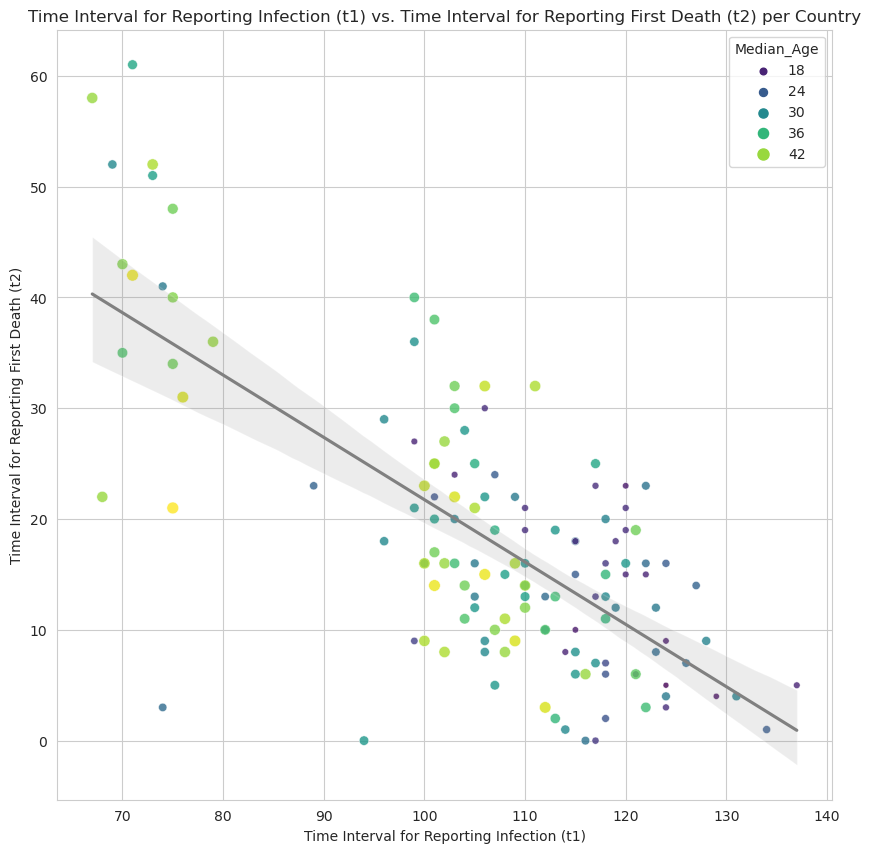

In [13]:
# Set the plot style
sns.set_style("whitegrid")

# Define the figure size
plt.figure(figsize=(10, 10))

# Create the scatter plot with color, size, and labels mapped
scatter_plot = sns.scatterplot(data=data, x="t1", y="t2", size="Median_Age", hue="Median_Age", palette="viridis", alpha=0.8)

# Add a regression line to show the overall trend
sns.regplot(data=data, x="t1", y="t2", scatter=False, color='gray')

# Set the labels and title
plt.title("Time Interval for Reporting Infection (t1) vs. Time Interval for Reporting First Death (t2) per Country")
plt.xlabel("Time Interval for Reporting Infection (t1)")
plt.ylabel("Time Interval for Reporting First Death (t2)")

# Show the plot
plt.show()

Analysis:
1. The pearson correlation between the 2 response variables is −0.7. This shows that t1 is inversely related to t2, such that taking a long to report a first confirmed infection is associated with taking a short amount of time to report a death soon afterwards.

2. The case of Zimbabwe and South Africa as shown in 2. Zim- babwe 124 days to report a first case, only to report a death 3 days later. Where else South Africa took 109 days to report a first case, and reported a death after 22 days.

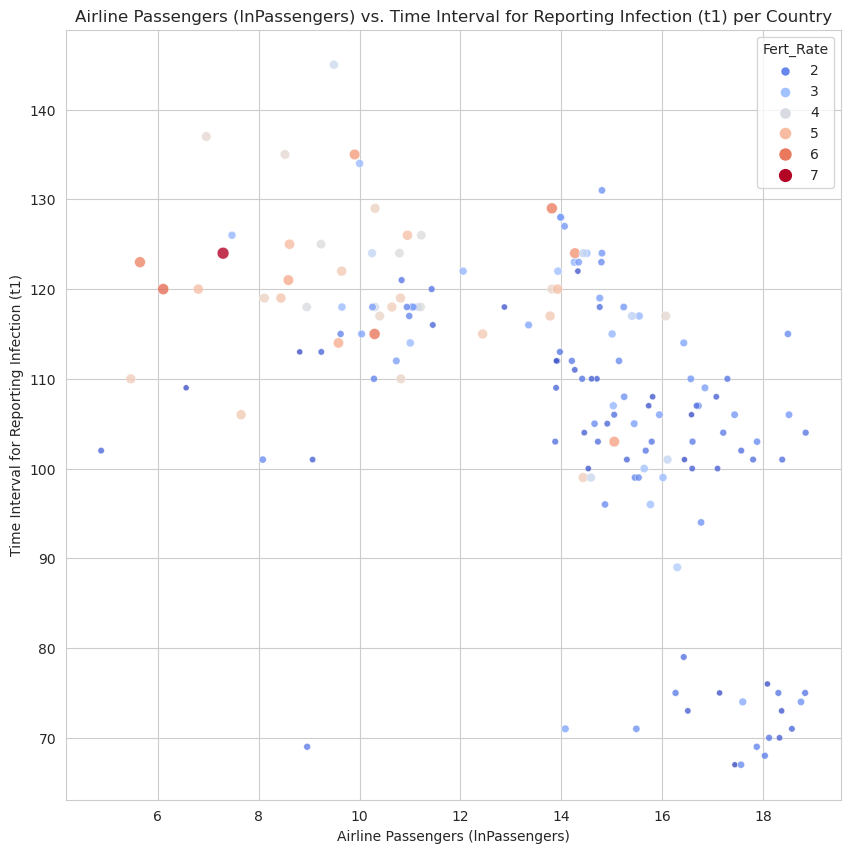

In [14]:
# Set the plot style
sns.set_style("whitegrid")

# Define the figure size
plt.figure(figsize=(10, 10))

# Create the scatter plot with color, size, and labels mapped
scatter_plot = sns.scatterplot(data=data, x="lnPassengers", y="t1", size="Fert_Rate", hue="Fert_Rate", palette="coolwarm", alpha=0.8)

# Add a regression line to show the overall trend
sns.regplot(data=data, x="lnPassengers", y="t1", scatter=False, color='gray')

# Set the labels and title
plt.title("Airline Passengers (lnPassengers) vs. Time Interval for Reporting Infection (t1) per Country")
plt.xlabel("Airline Passengers (lnPassengers)")
plt.ylabel("Time Interval for Reporting Infection (t1)")


# Show the plot
plt.show()

Analysis:

The pearson correlation between Population and t1 is −0.24. This shows that t1 is also inversely related to the number of airline passengers, such that a large number of airline passengers is associated with reporting a first confirmed case sooner

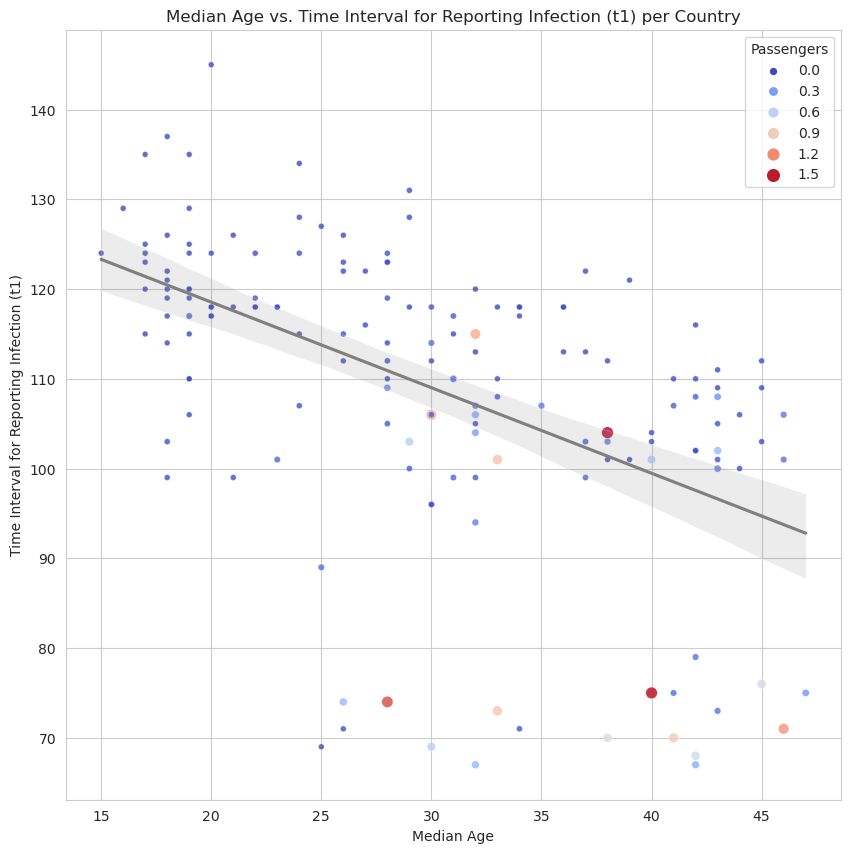

In [15]:
# Set a brighter and more visually appealing color palette
color_palette = "cool"

# Define the figure size
plt.figure(figsize=(10, 10))

# Create the scatter plot with color, size, and labels mapped
scatter_plot = sns.scatterplot(data=data, x="Median_Age", y="t1", size="Passengers", hue="Passengers", alpha=0.8, palette="coolwarm")

# Add a regression line to show the overall trend
sns.regplot(data=data, x="Median_Age", y="t1", scatter=False, color='gray')

# Set the labels and title
plt.title("Median Age vs. Time Interval for Reporting Infection (t1) per Country")
plt.xlabel("Median Age")
plt.ylabel("Time Interval for Reporting Infection (t1)")

# Show the plot
plt.show()

Analysis:

The pearson correlation is −0.51.
Gives an indication that older people appear to travel more, and even those who may not travel are more likely to interact with older people who do as opposed to their young counter parts.

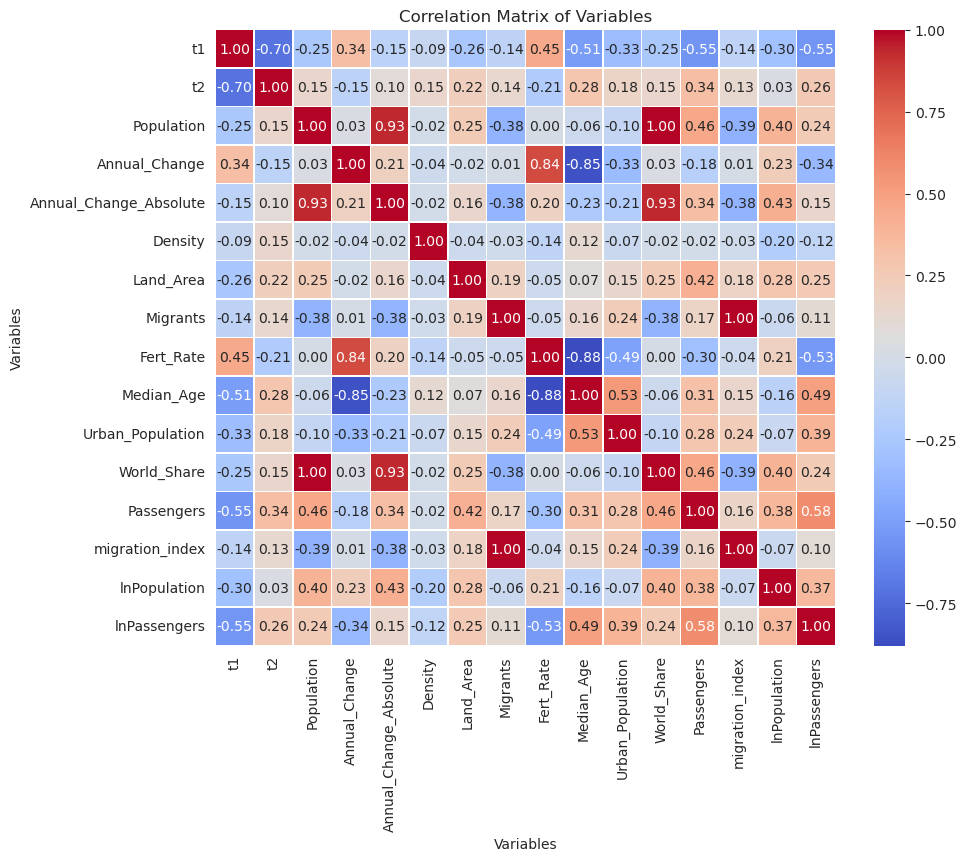

In [16]:
# Define the figure size
plt.figure(figsize=(10, 8))

# Create the correlation matrix heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set the title and axis labels
plt.title("Correlation Matrix of Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()